In [19]:
import sqlite3
import pandas as pd

In [20]:
conn = sqlite3.connect(r'C:\Users\thega\PycharmProjects\made-project\data\data.sqlite')
table_name = "income_data"  # Replace with your table name
data = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)


In [21]:
data

# Select only Age.Range and Salary columns for salaries >50K
result = data.loc[data['Salary'] == '>50K', ['Age.Range', 'Salary']]
print(result)


      Age.Range Salary
0            40   >50K
2            46   >50K
3            32   >50K
12           33   >50K
14           46   >50K
...         ...    ...
24532        52   >50K
24537        51   >50K
24540        40   >50K
24549        56   >50K
24554        40   >50K

[5935 rows x 2 columns]


In [22]:
# Group by Salary and Education, then count occurrences
salary_education_counts = data.groupby(['Salary', 'Education']).size().reset_index(name='Count')

# Display the result
print(salary_education_counts)


   Salary           Education  Count
0    <50K  Associate's Degree    514
1    <50K   Bachelor's Degree   4099
2    <50K    Doctorate Degree     91
3    <50K     High School/GED    582
4    <50K     Master's Degree    770
5    <50K                None    123
6    <50K        Some College   1232
7    <50K    Trade/Vocational    200
8   <=50K                10th    685
9   <=50K                11th    853
10  <=50K                12th    307
11  <=50K             1st-4th    127
12  <=50K             5th-6th    242
13  <=50K             7th-8th    434
14  <=50K                 9th    376
15  <=50K          Assoc-acdm    597
16  <=50K           Assoc-voc    784
17  <=50K           Bachelors   2326
18  <=50K           Doctorate     80
19  <=50K             HS-grad   6655
20  <=50K             Masters    554
21  <=50K           Preschool     35
22  <=50K         Prof-school    109
23  <=50K        Some-college   4464
24   >50K                10th     45
25   >50K                11th     47
2

Salary              <50K  <=50K  >50K  >=50K
Education                                   
Assoc-acdm             0    597   202      0
Assoc-voc              0    784   266      0
Associate's Degree   514      0     0    639
Bachelor's Degree   4099      0     0  16300
Bachelors              0   2326  1672      0
Doctorate              0     80   232      0
Doctorate Degree      91      0     0    905
HS-grad                0   6655  1270      0
High School/GED      582      0     0    552
Master's Degree      770      0     0   4830
Masters                0    554   710      0
None                 123      0     0    109
Preschool              0     35     0      0
Prof-school            0    109   326      0
Some College        1232      0     0   1351
Some-college           0   4464  1080      0
Trade/Vocational     200      0     0    252


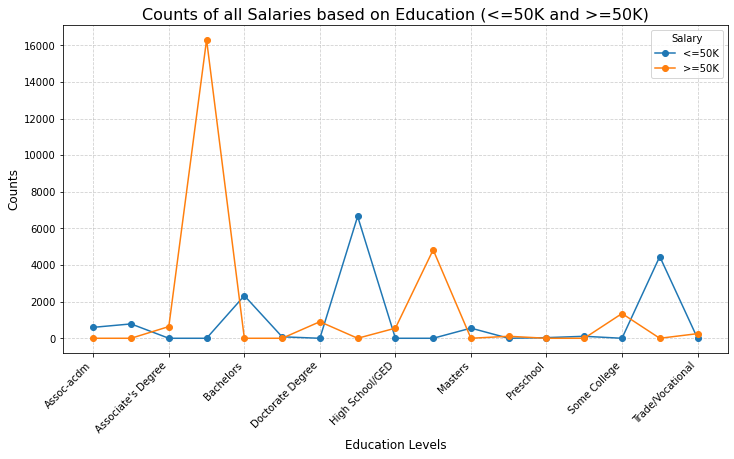

In [50]:

import matplotlib.pyplot as plt
# Create a pivot table to view counts by Education and Salary
pivot_table = data.pivot_table(index='Education', columns='Salary', aggfunc='size', fill_value=0)
#print(pivot_table)
#print(pivot_table.columns.tolist())
#print(pivot_table['<50K'])

index = [
    '10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th'
]

# Drop the specified columns (if they exist in the DataFrame)
pivot_table = pivot_table.drop(index=[row for row in index if row in pivot_table.index])
print(pivot_table)
# Assuming `pivot_table` is your existing DataFrame
# Combine the salary columns
pivot_table['<=50K_combined'] = pivot_table['<50K'] + pivot_table['<=50K']
pivot_table['>=50K_combined'] = pivot_table['>50K'] + pivot_table['>=50K']

# Keep only the combined columns
pivot_table = pivot_table[['<=50K', '>=50K']]

# Plot the data
pivot_table.plot(kind='line', marker='o', figsize=(14, 8))

# Customize the chart
plt.title('Counts of all Salaries based on Education (<=50K and >=50K)', fontsize=16)
plt.xlabel('Education Levels', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Salary', fontsize=10)
plt.tight_layout()

plt.gcf().set_size_inches(10, 6)  # For example, a 10x6 rectangular plot

# Save the plot as a PNG file
plt.savefig('line_plot_rectangle.png', bbox_inches='tight')

# Show the plot
plt.show()



In [31]:
# Group by Salary, Education, and Country, then count occurrences
salary_education_country_counts = data.groupby(['Salary', 'Education', 'Country']).size().reset_index(name='Count').sort_values('Count', ascending=False)

# Display the result
print(salary_education_country_counts.head(60))


    Salary           Education Country  Count
659  >=50K   Bachelor's Degree      US  15272
374  <=50K             HS-grad      US   6210
692  >=50K     Master's Degree      US   4549
455  <=50K        Some-college      US   4181
36    <50K   Bachelor's Degree      US   3529
323  <=50K           Bachelors      US   2094
530   >50K           Bachelors      US   1549
703  >=50K        Some College      US   1248
572   >50K             HS-grad      US   1213
99    <50K        Some College      US   1129
626   >50K        Some-college      US   1024
668  >=50K    Doctorate Degree      US    834
635  >=50K   Bachelor's Degree  CANADA    801
148  <=50K                11th      US    781
287  <=50K           Assoc-voc      US    744
593   >50K             Masters      US    656
124  <=50K                10th      US    637
79    <50K     Master's Degree      US    611
632  >=50K  Associate's Degree      US    570
265  <=50K          Assoc-acdm      US    556
399  <=50K             Masters    

    Salary           Education Country  Count
5     <50K  Associate's Degree      US    471
36    <50K   Bachelor's Degree      US   3529
44    <50K    Doctorate Degree      US     64
59    <50K     High School/GED      US    469
79    <50K     Master's Degree      US    611
86    <50K                None      US    100
99    <50K        Some College      US   1129
104   <50K    Trade/Vocational      US    177
124  <=50K                10th      US    637
148  <=50K                11th      US    781
165  <=50K                12th      US    266
181  <=50K             1st-4th      US     36
199  <=50K             5th-6th      US     73
221  <=50K             7th-8th      US    346
242  <=50K                 9th      US    291
265  <=50K          Assoc-acdm      US    556
287  <=50K           Assoc-voc      US    744
323  <=50K           Bachelors      US   2094
336  <=50K           Doctorate      US     64
374  <=50K             HS-grad      US   6210
399  <=50K             Masters    

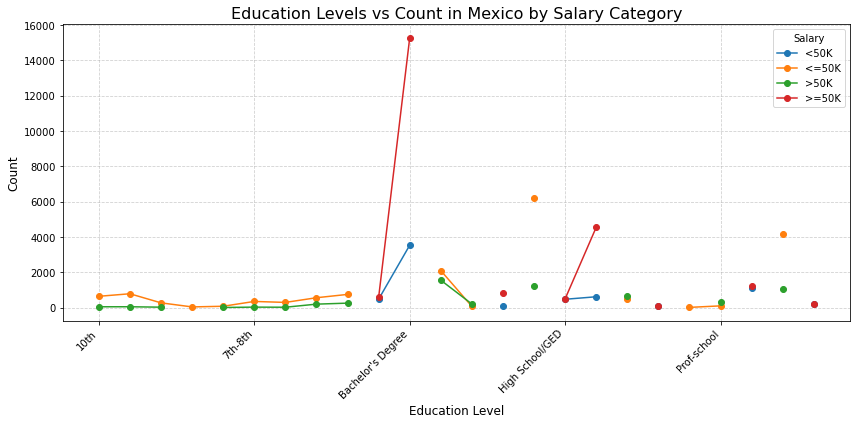

In [67]:
# Group by 'Salary', 'Education', and 'Country', then calculate counts
grouped_data = data.groupby(['Salary', 'Education', 'Country']).size().reset_index(name='Count')

# Filter rows where the country is Mexico
mexico_data = grouped_data[grouped_data['Country'] == 'US']

# Display the result
print(mexico_data)
import matplotlib.pyplot as plt

# Assuming the data is in a DataFrame named `mexico_data`

# Filter the data for Mexico and pivot it for plotting
mexico_pivot = mexico_data.pivot(index='Education', columns='Salary', values='Count')

# Plot the data
mexico_pivot.plot(kind='line', marker='o', figsize=(12, 6))

# Customize the chart
plt.title('Education Levels vs Count in Mexico by Salary Category', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Salary', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


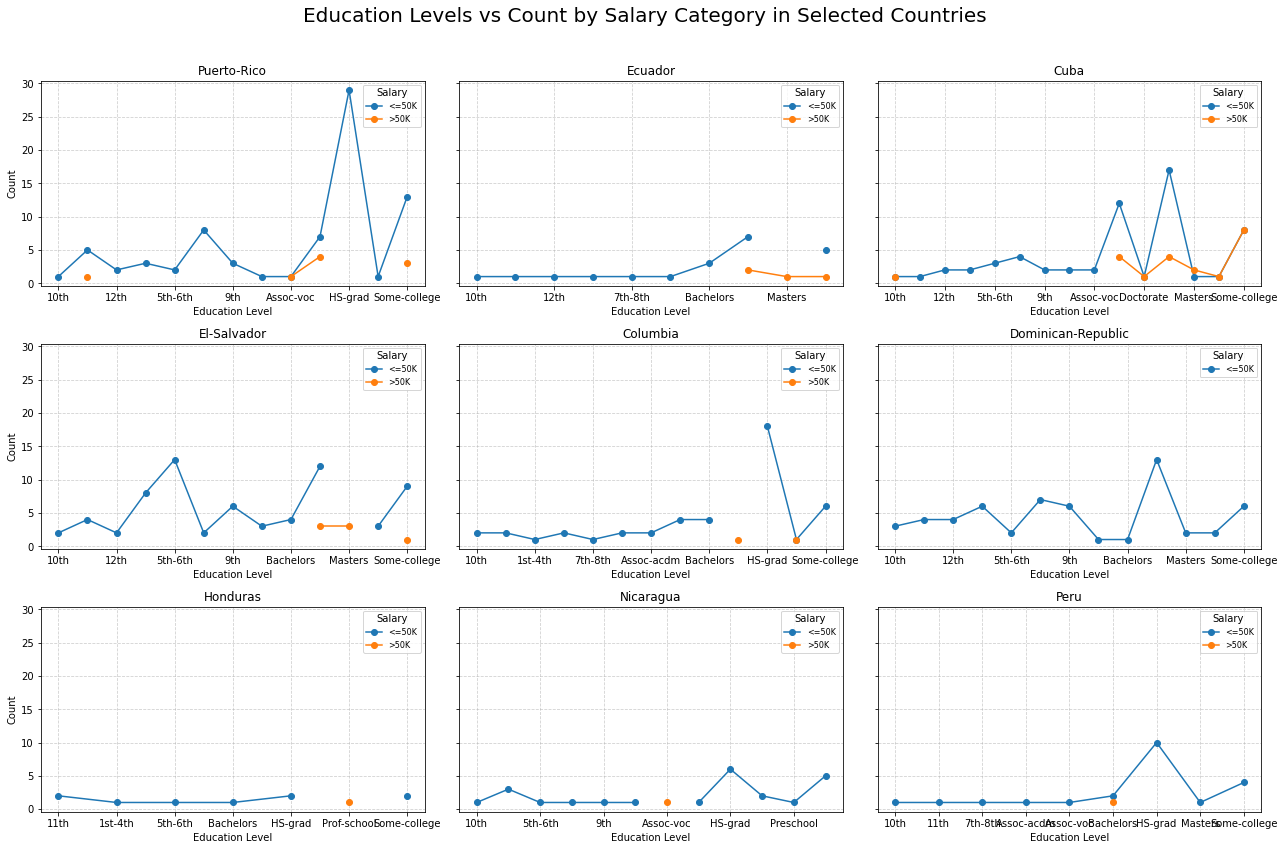

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by 'Salary', 'Education', and 'Country', then calculate counts
grouped_data = data.groupby(['Salary', 'Education', 'Country']).size().reset_index(name='Count')

# Filter data for the selected countries
countries = ['Puerto-Rico', 'Ecuador', 'Cuba', 'El-Salvador', 'Columbia', 'Dominican-Republic', 'Honduras', 'Nicaragua', 'Peru']
filtered_data = grouped_data[grouped_data['Country'].isin(countries)]

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 12), sharey=True)  # Adjust rows and columns for number of countries
axes = axes.flatten()

# Loop through each country and plot
for i, country in enumerate(countries):
    country_data = filtered_data[filtered_data['Country'] == country]
    pivot_data = country_data.pivot(index='Education', columns='Salary', values='Count')

    pivot_data.plot(kind='line', marker='o', ax=axes[i], title=country)
    axes[i].set_xlabel('Education Level')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Salary', fontsize=8)
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Remove empty subplots if any
for j in range(len(countries), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.suptitle('Education Levels vs Count by Salary Category in Selected Countries', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


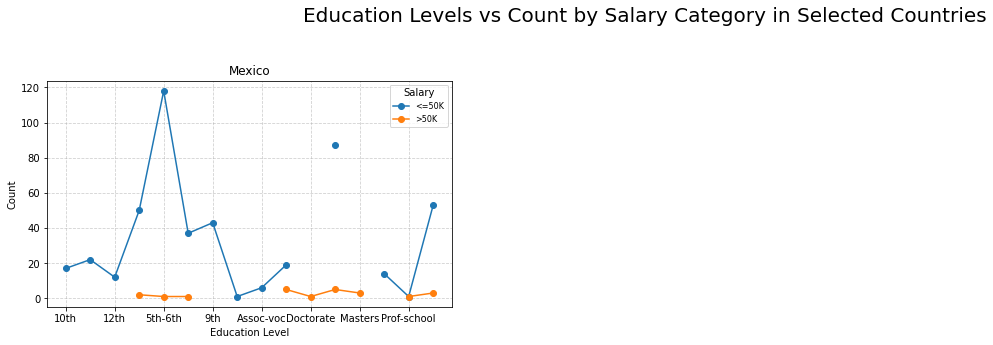

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by 'Salary', 'Education', and 'Country', then calculate counts
grouped_data = data.groupby(['Salary', 'Education', 'Country']).size().reset_index(name='Count')

# Filter data for the selected countries
countries = ['Mexico']
filtered_data = grouped_data[grouped_data['Country'].isin(countries)]

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 12), sharey=True)  # Adjust rows and columns for number of countries
axes = axes.flatten()

# Loop through each country and plot
for i, country in enumerate(countries):
    country_data = filtered_data[filtered_data['Country'] == country]
    pivot_data = country_data.pivot(index='Education', columns='Salary', values='Count')

    pivot_data.plot(kind='line', marker='o', ax=axes[i], title=country)
    axes[i].set_xlabel('Education Level')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Salary', fontsize=8)
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Remove empty subplots if any
for j in range(len(countries), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.suptitle('Education Levels vs Count by Salary Category in Selected Countries', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
